# Case Study: Haberman’s cancer survival Data-set

# Data Set Description:
The data-set contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago’s Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

# Attribute Information:
Age of patient at the time of operation (independent variable)
Patient’s year of operation (independent variable)
Number of positive axillary nodes detected (independent variable)
Survival status (dependent variable/class feature)

# Environment setup & Data load:

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [6]:
warnings.filterwarnings(action='ignore')

In [7]:
sns.set_style("whitegrid")

In [11]:
haberman = pd.read_csv("haberman.csv", header=None, names=["age_of_patient","year_of_operation","positive_auxilary_nodes","survival_status"])

In [10]:
pwd

'C:\\Users\\Windows 7\\Desktop'

In [12]:
print(haberman.head())

   age_of_patient  year_of_operation  positive_auxilary_nodes  survival_status
0              30                 64                        1                1
1              30                 62                        3                1
2              30                 65                        0                1
3              31                 59                        2                1
4              31                 65                        4                1


# Initial observation and Data Preparation:

In [13]:
#first check the no.of data point and features
print(haberman.shape)

(306, 4)


In [14]:
print(haberman.columns)

Index(['age_of_patient', 'year_of_operation', 'positive_auxilary_nodes',
       'survival_status'],
      dtype='object')


In [18]:
print(haberman.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age_of_patient             306 non-null int64
year_of_operation          306 non-null int64
positive_auxilary_nodes    306 non-null int64
survival_status            306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


In [20]:
print(haberman["survival_status"].unique())

[1 2]


In [23]:
haberman["survival_status"] = haberman["survival_status"].map({1:"alive",2:"dead"})
haberman["survival_status"] = haberman["survival_status"].astype('category')

In [24]:
print(haberman.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age_of_patient             306 non-null int64
year_of_operation          306 non-null int64
positive_auxilary_nodes    306 non-null int64
survival_status            306 non-null category
dtypes: category(1), int64(3)
memory usage: 7.6 KB
None


In [25]:
print(haberman.head())

   age_of_patient  year_of_operation  positive_auxilary_nodes survival_status
0              30                 64                        1           alive
1              30                 62                        3           alive
2              30                 65                        0           alive
3              31                 59                        2           alive
4              31                 65                        4           alive


In [30]:
print(type(haberman))

<class 'pandas.core.frame.DataFrame'>


In [33]:
print(haberman["survival_status"].value_counts())

alive    225
dead      81
Name: survival_status, dtype: int64


In [34]:
print(haberman["survival_status"].value_counts(normalize=True))

alive    0.735294
dead     0.264706
Name: survival_status, dtype: float64


In [35]:
print(haberman.describe())

       age_of_patient  year_of_operation  positive_auxilary_nodes
count      306.000000         306.000000               306.000000
mean        52.457516          62.852941                 4.026144
std         10.803452           3.249405                 7.189654
min         30.000000          58.000000                 0.000000
25%         44.000000          60.000000                 0.000000
50%         52.000000          63.000000                 1.000000
75%         60.750000          65.750000                 4.000000
max         83.000000          69.000000                52.000000


Clearly, the data-set is imbalanced, as the data for alive is 225 (which constitutes 73.52%*) whereas only 81 for dead (nearly 26.47 %*).
*survived after 5 years & died within 5 years of operation

# Unitvariate Analysis

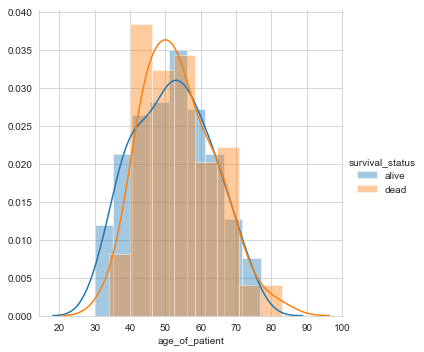

In [40]:
sns.FacetGrid(haberman,hue='survival_status',height=5).map(sns.distplot,"age_of_patient").add_legend()

In [39]:
plt.show()

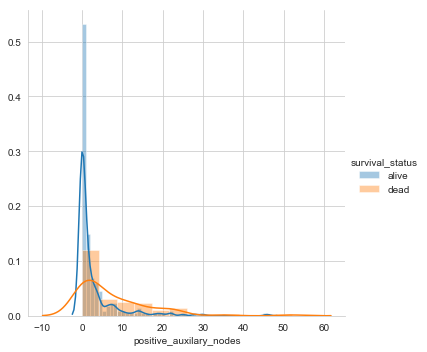

In [41]:
sns.FacetGrid(haberman,hue='survival_status',height=5).map(sns.distplot,"positive_auxilary_nodes").add_legend()
plt.show()

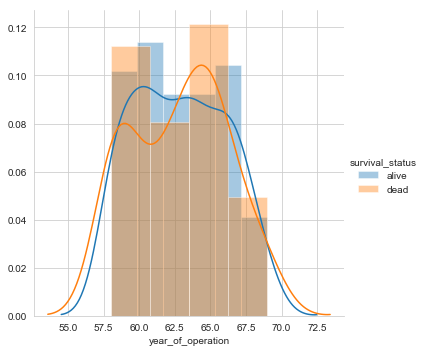

In [42]:
sns.FacetGrid(haberman,hue='survival_status',height=5).map(sns.distplot,"year_of_operation").add_legend()
plt.show()

Clearly, the age_of_patient & year_of_operation of both classes (survived & not survived) overlap.
And hence it is quite impossible to derive any positive insights or patterns.

Whereas the number of positive_auxilary_nodes seems promising. Even though it is right-skewed most of the alive patients have less than 5 positive auxiliary nodes

So we will proceed with positive_auxiliary_nodes and perform more techniques to get more information and patterns.

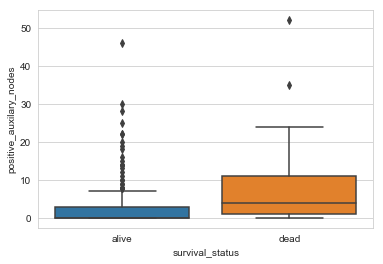

In [46]:
sns.boxplot(x="survival_status",y="positive_auxilary_nodes",data=haberman)
plt.show()

# Conclusion:
1. From univariate analysis and Quantitative analysis, it is found that positive_auxilary_nodes are an important feature that determines the survival_status of the patient.

2. Among the patients who survived, 80% had less than 5 positive_auxilary_nodes.

3. The dataset is not balanced, with approx. 73% belong to the survived class and 26% belong to not survived class.

From these insights about data, you may not be able to accurately predict whether the new observation (patient) can survive the next 5 years and beyond that or not. But these insights were able to answer some of the questions like what’s the suitable algorithm to choose or help in the selection of the feature variables etc.